# Problem 1 
N/A

# Problem 2
xi = time to load Canvas in milliseconds
λ*e^-λ*x
Derive the maximum likelihood estimate for λ from first principles

argmax λe^(-λx)= argmax ln(λe^(-λx)) = d/dx ln(λe^(-λx) = d/dx -λxln(λ)
-xln(λ)-x=0
λ = e^(-1) = 1/e


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import axes3d
import matplotlib.mlab as mlab
from sklearn import datasets, linear_model
from sklearn.cross_validation import train_test_split
%matplotlib inline

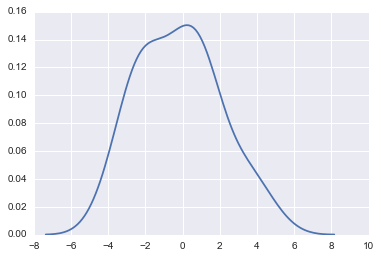

In [40]:
# Problem 3
# A) i)
mean, cov = [0, 0], [(4, 0), (0, 9)]
x, y = np.random.multivariate_normal(mean, cov, size=50).T
ax = sns.kdeplot(x)

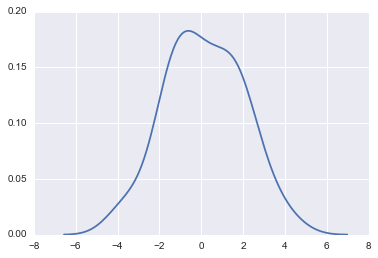

In [41]:
# Problem 3
# A) ii)
mean, cov = [0,0], [(4,3), (3,9)]
x, y = np.random.multivariate_normal(mean,cov,size=50).T
ax = sns.kdeplot(x)

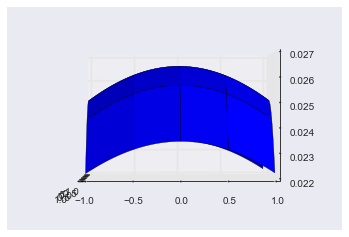

In [67]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x, y = np.mgrid[-1:1:.01, -1:1:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
rv = multivariate_normal([0, 0], [[4, 0], [0, 9]])

ax.plot_surface(x, y,rv.pdf(pos),rstride = 50, cstride = 50)

for angle in range(0, 360):
    ax.view_init(0, angle)
    plt.draw()


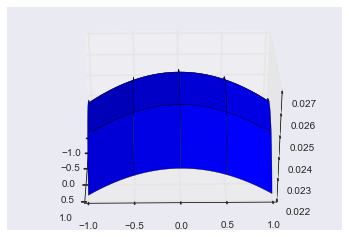

In [69]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x, y = np.mgrid[-1:1:.01, -1:1:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
rv = multivariate_normal([0, 0], [[4, 0], [0, 9]])

ax.plot_surface(x, y,rv.pdf(pos),rstride = 50, cstride = 50)

for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()

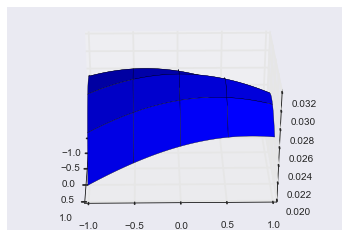

In [70]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x, y = np.mgrid[-1:1:.01, -1:1:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
rv = multivariate_normal([0, 0], [[4, 3], [3, 9]])

ax.plot_surface(x, y,rv.pdf(pos),rstride = 50, cstride = 50)

for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()

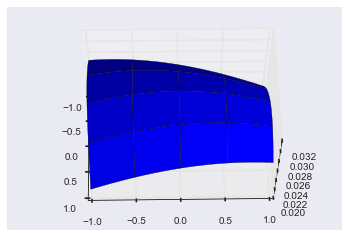

In [78]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x, y = np.mgrid[-1:1:.01, -1:1:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
rv = multivariate_normal([0, 0], [[4, 3], [3, 9]])

ax.plot_surface(x, y,rv.pdf(pos),rstride = 50, cstride = 50)

for angle in range(0, 360):
    ax.view_init(60, angle)
    plt.draw()

Y|X=1 ~N(3/4,27/4)
X|Y=1 ~N(1/3,3)

# Problem 4

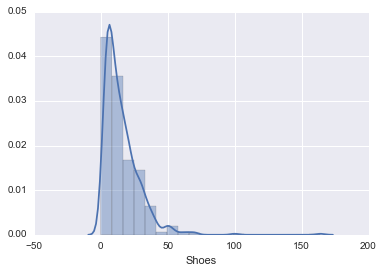

In [8]:
student_data = pd.read_csv("studentdata.csv", sep=' ', quoting = 1)

#print(student_data.shape)
student_data = student_data.dropna()
# student_data.head()

# Part A
shoes = student_data['Shoes'].tolist()
sns.distplot(shoes,bins=20,axlabel = "Shoes")


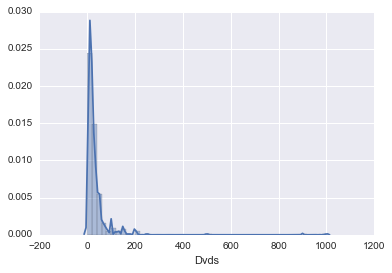

In [9]:
# B)
dvds = student_data['Dvds'].tolist()
sns.distplot(dvds, axlabel = "Dvds")
# It appears to follow a log normal distribution

In [10]:
# C)
student_data['Haircut'].describe()

count    559.000000
mean      26.228569
std       27.782842
min        0.000000
25%       10.000000
50%       17.000000
75%       30.000000
max      180.000000
Name: Haircut, dtype: float64

In [11]:
# C) continued
student_data['Haircut'].describe([0.025, 0.975])

count    559.000000
mean      26.228569
std       27.782842
min        0.000000
2.5%       0.000000
50%       17.000000
97.5%    100.450000
max      180.000000
Name: Haircut, dtype: float64

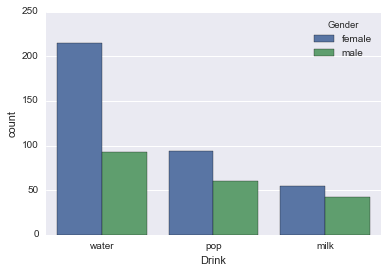

In [12]:
# D)
Drink  = student_data['Drink'].tolist()
sns.countplot(x = 'Drink', hue = 'Gender', data = student_data)

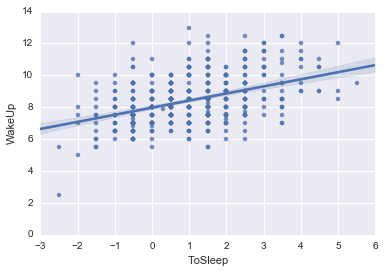

In [13]:
# E)
sns.regplot(x = 'ToSleep', y='WakeUp', data = student_data)
# There is a positive correlation between to sleep and wakeup showing that 
# the later you go to bed the later you wake up

# Problem 5

In [14]:
housing_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data", 
                           delim_whitespace=True, header = None, names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", 
                                                                          "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B",
                                                                          "LSTAT", "MEDV"] )
housing_data = housing_data.dropna()
#housing_data.head()


Coefficients: 
 [[-0.57275582]]
Residual sum of squares: 23.20
Variance score: 0.54


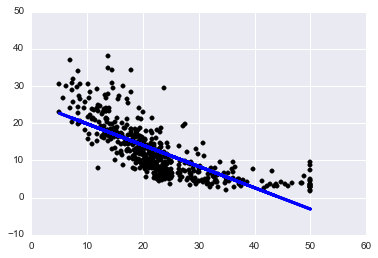

In [15]:
# part A and B
medv = housing_data.MEDV
lstat = housing_data.LSTAT
medv = medv.reshape(-1,1)
lstat = lstat.reshape(-1,1)
#, lstat = housing_data['MEDV'].tolist(), housing_data['LSTAT'].tolist()
#lstat = housing_data['LSTAT'].tolist()
regr = linear_model.LinearRegression()
regr.fit(medv,lstat)
#print(medv.length())

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(medv) - lstat) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(medv, lstat))

# Plot outputs
plt.scatter(medv, lstat,  color='black')
plt.plot(medv, regr.predict(medv), color='blue', linewidth=3)

plt.show()

# Comments on 5 A and B
the coefficient is -0.572 which says for each 1 medv(Median value of owner-occupied homes in $1000's) increases, lstat  (% lower status of the population)  will decrease by 0.572)
The regression line generally captures the negative fit of the data however a higher order fit would more accurately
predict the curvature of the data such that it could reach the higher values of lstat on the lower end of medv and the flattening of the data at the higher end of medv

In [16]:
# C
# is dep variable only price of homes and independent everything else
indep_vars = ['CRIM', 'ZN', "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B","LSTAT"]
dep_vars = ["MEDV"]
indep_data = housing_data[indep_vars]
dep_data = housing_data[dep_vars]
indep_train, indep_test, dep_train, dep_test = train_test_split(indep_data, dep_data, test_size=0.33, random_state=42)

In [17]:
regr = linear_model.LinearRegression()
regr.fit(indep_train,dep_train)
print('Coefficients: {0}'.format(list(zip(indep_vars,np.squeeze(regr.coef_)))))

Coefficients: [('CRIM', -0.12874971839943367), ('ZN', 0.037823222848637129), ('INDUS', 0.058210923346930898), ('CHAS', 3.2386681222716147), ('NOX', -16.169811964368719), ('RM', 3.9020511607116051), ('AGE', -0.012850782518182863), ('DIS', -1.4222242954487243), ('RAD', 0.23485391491030444), ('TAX', -0.0082133194701773451), ('PTRATIO', -0.92872245907989437), ('B', 0.011769592080103102), ('LSTAT', -0.54756633817619871)]


In [27]:
regr_predict = regr.predict(indep_test)
print("Residual sum of squares: %.2f"
      % np.mean((regr_predict - dep_test) ** 2))

Residual sum of squares: 20.72


# discussion of RMSE
The RMSE is 20.72 which means the average squared error is about 20 (in thousands) for the housing prices
This means the average distance the multiple linear regression has to a predicted value is 20. This error might
be acceptable but a different model to fit the data, such as a quadratic might fit better.